# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv')
train_set = train_data.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(
    feature_range = (0, 1)
)
train_set_scaled = sc.fit_transform(train_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(train_set_scaled[i-60:i, 0])
  y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(
    LSTM(
        units = 50, 
        return_sequences = True, 
        input_shape = (X_train.shape[1], 1)
    )
)

regressor.add(
    Dropout(
        0.2
    )
)

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(
    LSTM(
        units = 50, 
        return_sequences = True
    )
)

regressor.add(
    Dropout(
        0.2
    )
)

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(
    LSTM(
        units = 50, 
        return_sequences = True
    )
)

regressor.add(
    Dropout(
        0.2
    )
)

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(
    LSTM(
        units = 50, 
        return_sequences = False
    )
)

regressor.add(
    Dropout(
        0.2
    )
)

### Adding the output layer

In [12]:
regressor.add(
    Dense(
        units = 1
    )
)

### Compiling the RNN

In [13]:
regressor.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

### Fitting the RNN to the Training set

In [14]:
regressor.fit(
    X_train, 
    y_train,
    epochs = 100, batch_size = 32
)

Epoch 1/100
38/38 [==============================] - 26s 260ms/step - loss: 0.0416
Epoch 2/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0043
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_data.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [16]:
total_data = pd.concat(
    (
        train_data['Open'],
        test_data['Open']
    ), 
    axis = 0
)

inputs = total_data[len(total_data) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

1/1 [==============================] - 2s 2s/step
[[785.8254 ]
 [782.86505]
 [783.79834]
 [785.0589 ]
 [788.378  ]
 [794.3031 ]
 [798.8039 ]
 [799.6704 ]
 [799.5852 ]
 [799.5573 ]
 [799.76776]
 [799.9385 ]
 [800.15955]
 [801.1701 ]
 [802.3592 ]
 [807.9819 ]
 [815.0693 ]
 [821.95764]
 [824.4705 ]
 [818.1096 ]]


### Visualising the results

<function matplotlib.pyplot.show(close=None, block=None)>

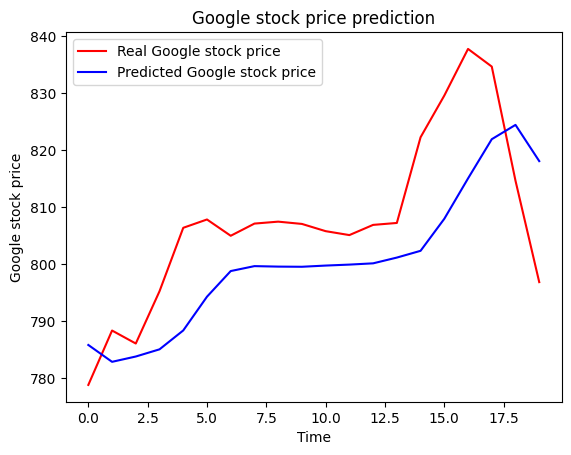

In [17]:
plt.plot(
    real_stock_price,
    color = 'red',
    label = 'Real Google stock price'
)
plt.plot(
    predicted_stock_price,
    color = 'blue',
    label = 'Predicted Google stock price'
)
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show